In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [34]:
df = pd.read_csv("/Users/unun/Desktop/Sony Project/End of Year Albums 2016-2020.csv")

In [91]:
df

,TitleArtist1,TitleArtist3,TitleArtist4,Year,Rank,in_sony,in_warner
0,ELLIPSIS,BIFFY CLYRO,14TH FLOOR,2016,59,NO,NO
283,1000 FORMS OF FEAR,SIA,MONKEY PUZZLE/RCA,2016,89,NO,NO
286,BEST OF BOWIE,DAVID BOWIE,PARLOPHONE,2016,10,NO,NO
287,A HEAD FULL OF DREAMS,COLDPLAY,PARLOPHONE,2016,2,NO,NO
288,LEGACY,DAVID BOWIE,PARLOPHONE,2016,60,NO,NO
...,...,...,...,...,...,...,...
235,MUSIC TO BE MURDERED BY,EMINEM,INTERSCOPE,2020,11,NO,NO
368,CHRISTMAS,MICHAEL BUBLE,REPRISE,2020,57,NO,NO
369,GREATEST HITS - GOD'S FAVORITE BAND,GREEN DAY,REPRISE,2020,85,NO,NO
354,CONFETTI,LITTLE MIX,RCA,2020,29,NO,NO


In [73]:
df.dtypes

TitleArtist1    object
TitleArtist3    object
TitleArtist4    object
Year             int64
Rank             int64
dtype: object

In [37]:
df['Pos'] = df['Pos'].astype('str')

In [38]:
df['Pos_new'] = df['Pos'].str.split('-')

In [46]:
df['Pos_new_no'] = df['Pos'][-3:-1]

In [68]:
df.drop('Pos', axis=1, inplace=True)
df.drop('Pos_new', axis=1, inplace=True)
df.drop('Pos_new_no', axis=1, inplace=True)

In [ ]:
#Split Year and ranking

In [54]:
my_Pos = df['Pos']

In [55]:
my_Pos = list(map(lambda x: x.split('-')[0], my_Pos))

In [62]:
df['Year'] = my_Pos

In [63]:
my_rank = df['Pos']

In [64]:
my_rank = list(map(lambda x: x.split('-')[1], my_rank))

In [66]:
df['Rank'] = my_rank

In [72]:
df['Year'] = pd.to_numeric(df['Year'])
df['Rank'] = pd.to_numeric(df['Rank'])
df['TitleArtist1'] = df['TitleArtist1'].astype(str)
df['TitleArtist3'] = df['TitleArtist3'].astype(str)
df['TitleArtist4'] = df['TitleArtist4'].astype(str)

In [76]:
df.sort_values('Year', inplace=True)

In [83]:
df['TitleArtist4'].value_counts()

POLYDOR                   32
INTERSCOPE                29
ISLAND                    22
EMI                       22
COLUMBIA                  21
                          ..
YOUNG TURKS RECORDINGS     1
FISH PEOPLE                1
HELIUM 3/WARNER BROS       1
14TH FLOOR                 1
COLUMBIA/ITNO              1
Name: TitleArtist4, Length: 91, dtype: int64

In [117]:
df['in_sony']= df['TitleArtist4'].apply(lambda x: 'YES' if (x == 'ARISTA' or x == "BLACK BUTTER" or x == "BMG" or x == "COLUMBIA" or x == "DISRUPTOR" or x == "EPIC" or x == "MINISTRY OF SOUND" or x == "RCA" or x == "RELENTLESS" or x == "SONY MUSIC C6" or x == "SYCO MUSIC") else 'NO') 

In [120]:
df['in_warner']= df['TitleArtist4'].apply(lambda x: 'YES' if (x == "14TH FLOOR" or x == "AJ TRACEY" or x == "ASYLM" or x == "ATLANTIC" or x == "EAST WEST" or x == "INTERSCOPE" or x == "MERKY" or x == "PARLOPHONE" or x == "REPRISE" or x == "RHINO" or x == "WARNER BROS" or x == "WARNER RECORDS") else 'NO') 

In [121]:
df['in_universal']= df['TitleArtist4'].apply(lambda x: 'YES' if (x == 'APPLE CORPS' or x == 'CAPITOL' or x == 'CASH MONEY' or x == 'DECCA' or x == 'DEF JAM' or x == 'ISLAND' or x == 'MERCURY' or x == 'POLYDOR' or x == 'REPUBLIC' or x == 'REPUBLIC RECORDS' or x == 'UMG') else 'NO') 

In [118]:
df['in_sony'].value_counts()

NO     416
YES     84
Name: in_sony, dtype: int64

In [122]:
df['in_warner'].value_counts()

NO     390
YES    110
Name: in_warner, dtype: int64

In [123]:
df['in_universal'].value_counts()

NO     391
YES    109
Name: in_universal, dtype: int64

In [131]:
num_in_top3 = df['in_universal'].value_counts()['YES'] + df['in_sony'].value_counts()['YES'] + df['in_warner'].value_counts()['YES']
num_in_top3

303

In [134]:
#% owned by top3 since 2016-2020
(num_in_top3/df['TitleArtist4'].count())*100

60.6

In [136]:
df['in_sony'].groupby(df['Year']).value_counts()

Year  in_sony
2016  NO         87
      YES        13
2017  NO         79
      YES        21
2018  NO         84
      YES        16
2019  NO         81
      YES        19
2020  NO         85
      YES        15
Name: in_sony, dtype: int64

<AxesSubplot:xlabel='in_sony', ylabel='count'>

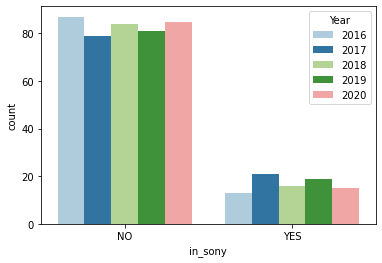

In [151]:
sns.countplot(x='in_sony', hue='Year', data=df, palette='Paired')

In [137]:
df['in_warner'].groupby(df['Year']).value_counts()

Year  in_warner
2016  NO           79
      YES          21
2017  NO           79
      YES          21
2018  NO           74
      YES          26
2019  NO           78
      YES          22
2020  NO           80
      YES          20
Name: in_warner, dtype: int64

<AxesSubplot:xlabel='in_warner', ylabel='count'>

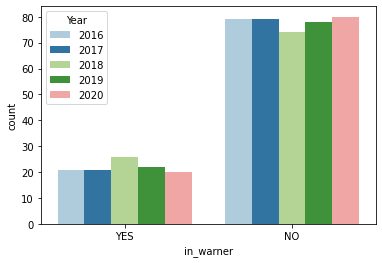

In [147]:
sns.countplot(x='in_warner', hue='Year', data=df, palette='Paired')

In [138]:
df['in_universal'].groupby(df['Year']).value_counts()

Year  in_universal
2016  NO              81
      YES             19
2017  NO              79
      YES             21
2018  NO              83
      YES             17
2019  NO              76
      YES             24
2020  NO              72
      YES             28
Name: in_universal, dtype: int64

<AxesSubplot:xlabel='in_universal', ylabel='count'>

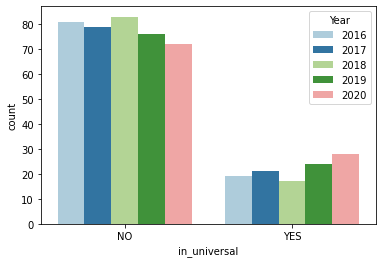

In [148]:
sns.countplot(x='in_universal', hue='Year', data=df, palette='Paired')

In [160]:
artist_df = df['TitleArtist3'].groupby(df['Year']).value_counts()

In [171]:
artists_df = pd.DataFrame(artist_df)

In [172]:
artists_df

TitleArtist3
Year TitleArtist3                         
2016 DAVID BOWIE                         6
     1975                                2
     ADELE                               2
     CATFISH & THE BOTTLEMEN             2
     ELVIS PRESLEY                       2
...                                    ...
2020 TOM WALKER                          1
     TRAVIS SCOTT                        1
     WEEKND                              1
     WHITNEY HOUSTON                     1
     XXXTENTACION                        1

[390 rows x 1 columns]

In [173]:
df['TitleArtist3'].value_counts().head(20)

ED SHEERAN                       15
MOTION PICTURE CAST RECORDING    12
OASIS                            12
EMINEM                           10
QUEEN                            10
DAVID BOWIE                      10
FLEETWOOD MAC                    10
ARCTIC MONKEYS                    9
ARIANA GRANDE                     9
LITTLE MIX                        9
POST MALONE                       8
JESS GLYNNE                       8
DRAKE                             8
SAM SMITH                         8
TAYLOR SWIFT                      7
BEATLES                           7
ADELE                             7
MICHAEL BUBLE                     7
GEORGE MICHAEL                    6
AMY WINEHOUSE                     5
Name: TitleArtist3, dtype: int64